In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(66, 2)

In [3]:
df.head()

,Time,domain
0,2022-04-17 23:32:38,accounts.google.com
1,2022-04-17 23:32:50,webauth.umbc.edu
2,2022-04-17 23:32:50,webauth.umbc.edu
3,2022-04-17 23:33:01,accounts.google.com
4,2022-04-17 23:33:01,webauth.umbc.edu


In [4]:
df.tail()

,Time,domain
61,2022-04-19 14:24:40,us.shein.com
62,2022-04-19 14:24:53,www.google.com
63,2022-04-19 14:24:56,stackoverflow.com
64,2022-04-19 14:25:11,in.search.yahoo.com
65,2022-04-19 14:25:12,www.amazon.in


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-04-17 23:32:38,accounts.google.com
1,2022-04-17 23:32:50,webauth.umbc.edu
2,2022-04-17 23:32:50,webauth.umbc.edu
3,2022-04-17 23:33:01,accounts.google.com
4,2022-04-17 23:33:01,webauth.umbc.edu


In [14]:
df['domain'].value_counts()[:50]

www.google.com              14
in.search.yahoo.com         10
mail.google.com              6
webauth.umbc.edu             6
accounts.google.com          5
gds.google.com               4
www.codecademy.com           3
www.amazon.in                3
stackoverflow.com            3
us.shein.com                 2
www.w3schools.com            2
www.youtube.com              2
www.netflix.com              1
myaccount.google.com         1
github.com                   1
www.articlesprosport.com     1
www.amazon.com               1
www.target.com               1
Name: domain, dtype: int64

<AxesSubplot:>

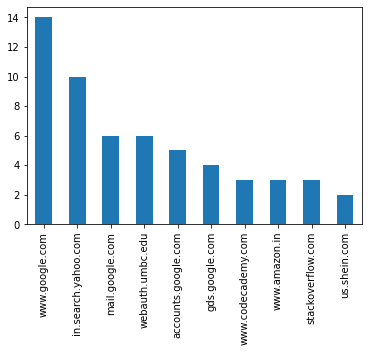

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
13     9
14    43
23    14
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

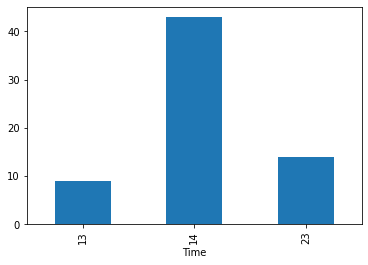

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-04-17 23:32:38,accounts.google.com,Sunday,6
1,2022-04-17 23:32:50,webauth.umbc.edu,Sunday,6
2,2022-04-17 23:32:50,webauth.umbc.edu,Sunday,6
3,2022-04-17 23:33:01,accounts.google.com,Sunday,6
4,2022-04-17 23:33:01,webauth.umbc.edu,Sunday,6


In [19]:
df['Day'].value_counts()

Tuesday    52
Sunday     14
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

1    52
6    14
Name: DayIndex, dtype: int64

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (7).

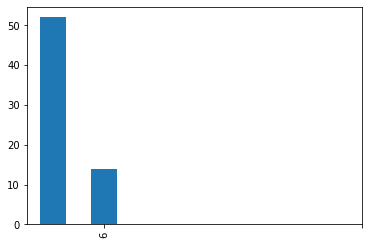

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-04-17 23:32:38,accounts.google.com,Sunday,6,True
1,2022-04-17 23:32:50,webauth.umbc.edu,Sunday,6,True
2,2022-04-17 23:32:50,webauth.umbc.edu,Sunday,6,True
3,2022-04-17 23:33:01,accounts.google.com,Sunday,6,True
4,2022-04-17 23:33:01,webauth.umbc.edu,Sunday,6,True


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-04-17 23:32:38,accounts.google.com,Sunday,6,True
1,2022-04-17 23:32:50,webauth.umbc.edu,Sunday,6,True
2,2022-04-17 23:32:50,webauth.umbc.edu,Sunday,6,True
3,2022-04-17 23:33:01,accounts.google.com,Sunday,6,True
4,2022-04-17 23:33:01,webauth.umbc.edu,Sunday,6,True


In [25]:
weekday['domain'].value_counts()[:5]

www.google.com         12
in.search.yahoo.com    10
mail.google.com         5
gds.google.com          4
stackoverflow.com       3
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

webauth.umbc.edu       6
accounts.google.com    5
www.google.com         2
mail.google.com        1
Name: domain, dtype: int64

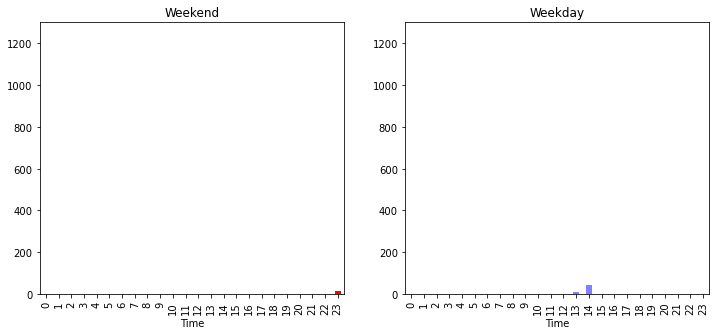

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

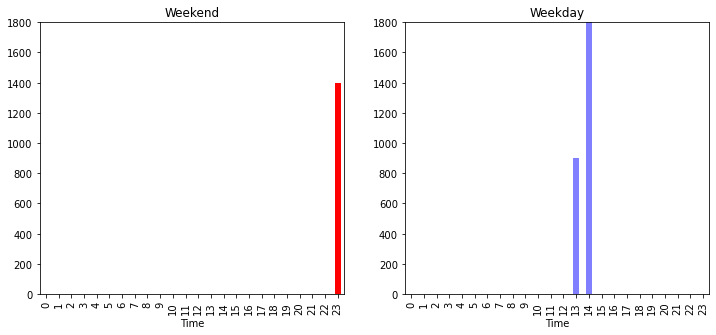

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

www.google.com         14
in.search.yahoo.com    10
mail.google.com         6
webauth.umbc.edu        6
accounts.google.com     5
gds.google.com          4
www.codecademy.com      3
www.amazon.in           3
stackoverflow.com       3
us.shein.com            2
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

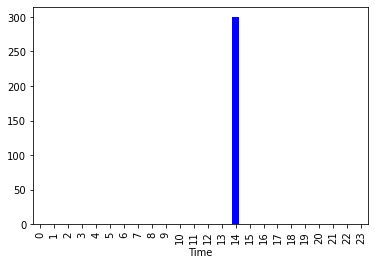

In [33]:
_= show_domain_stats('stackoverflow', 'blue')

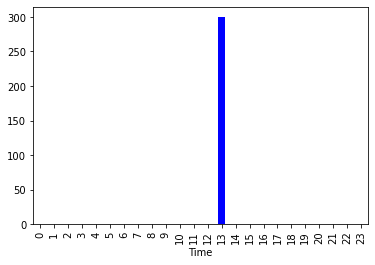

In [34]:
_= show_domain_stats('netflix|youtube|imdb', 'blue')

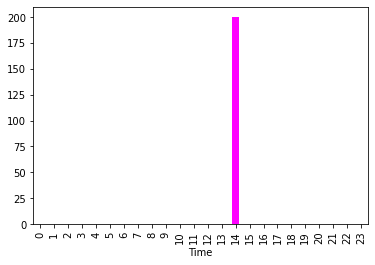

In [35]:
_ = show_domain_stats('shein', 'magenta')


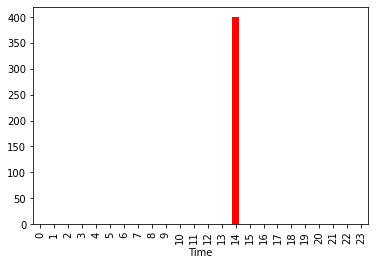

In [40]:
_ = show_domain_stats('amazon', 'red')

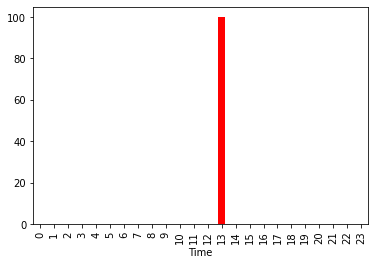

In [37]:
_ = show_domain_stats('netflix', 'red')

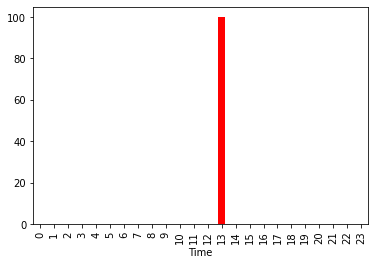

In [38]:
_ = show_domain_stats('netflix|disney|prime', 'red')

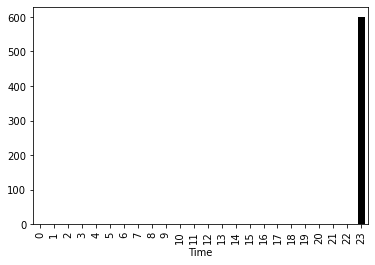

In [39]:
_=show_domain_stats('umbc', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

Based on the data, what I can tell is:
1. This is definitely a personal computer as multiple websites like youtube, imdb, netflix are being accessed which are unrealted to any work or business. When a work computer is assigned it should be solely used for work purpose until unless any emergency situations are faced. As I didnot find accessing any websites that are related to work, I can say that it is personal computer.
2. Looking at the history the person is accessing UMBC website multiple times. So the person could be a student at UMBC. There could also be case where the person might be working for UMBC but looking at other websites that are accessed by the person like stackoverflow, W3schools and spending more amount of time on movies websites. That person might be student. 
3. If we consider the persons interests, it should be watching netflix, youtube, prime and shopping from shein, target.
4. I find there is 